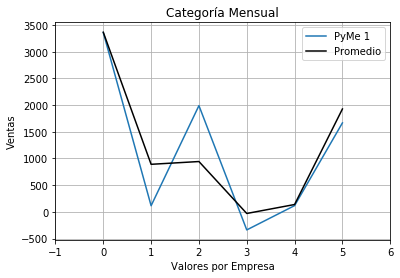

In [3]:
from tkinter import *# Normal Tkinter.*widgets are not themed!from ttkthemes 
from tkinter.ttk import *
from ttkthemes import ThemedTk
import tkinter.messagebox as msg
import tkinter.font as font
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def Prom(Matriz):
    #Obtenemos las dimensiones de la matriz 
    Ren = Matriz.shape[0]
    Col = Matriz.shape[1]
    aux = np.zeros(Ren)
    for i in range(Ren):
        suma = 0
        for j in range (Col):
            suma += Matriz[i,j]
        #Obteniendo el promedio
        aux[i] = suma / Ren
    return aux

#Proceso principial que recibe la matriz a analizar
def Graf_Retro(Matriz, Promedios = None):
    Matriz = np.mean(Matriz, axis = 0)
    Promedios = (np.random.random_sample((1,len(Matriz))) * Matriz) + (np.random.random_sample((1,len(Matriz))) * np.mean(Matriz))
    Col = len(Matriz)
    
    plt.figure()
    plt.plot(Matriz,label = 'PyMe 1')
    
    plt.plot(Promedios[0],label = "Promedio",color= "Black")
       
    plt.ylabel("Ventas")
    plt.xlabel("Valores por Empresa")
    plt.title("Categoría Mensual")
    
    plt.xlim(-1, len(Matriz))
    #plt.ylim(0,23)
    
    plt.grid()
    plt.legend(loc = "upper right")
    
    Resta = np.mean(Matriz) - np.mean(Promedios[0])
    Dif = Resta * 100 / np.mean(Promedios[0])
    return Dif
        
    plt.show()
    
#-----------------------------Empieza lo de la Interface------------------------------------

def agregar(x = None):
    global resultado
    numero = cuadroCantidad.get()
    nombre = cuadroNombre.get()
    resultado += float(numero)
    cuadroResultado.config(state = ACTIVE)
    Resultado.set(resultado)
    cuadroResultado.config(state = DISABLED)
    a = [float(numero),'\t \t \t', nombre, '\n']
    TextoLargo.config(state = 'normal')
    for i in range(4):
        TextoLargo.insert(END,a[i])
    TextoLargo.config(state = 'disabled')
    
    Cantidad.set('')
    Nombre.set('')
    
    if not os.path.exists('ventas.csv'):
        with open("ventas.csv", "w+") as ventas:
            ventas.write("DINERO,DESCRIPCION\n")
            ventas.write("{} , {}\n".format(numero, nombre))
    else:
        with open("ventas.csv", "a+") as ventas:
            ventas.write(f"{numero}, {nombre}\n")
            
def Retroalimentacion():
    #----------------------------------------Invocando al set que tengamos-------------------------------------
    PyMe1 = np.random.random_sample((1,5))
    tienda_real = pd.read_csv("tienda_real.csv").apply(pd.to_numeric, errors = 'coerce')
    retro = Graf_Retro(tienda_real.values)
    
    if retro < 0:
        retro *= -1        
        retro1 = "La empresa está por debajo del promedio en un {0:.2f}".format(retro), "%"
    else:
        retro1 = "La empresa está por arriba del promedio en un {0:.2f}".format(retro), "%"
    
    if retro <= 25:
        retro2 =  "Te recomendamos administrar un poco más tus gastos, los numeros obtenidos no son malos, pero a traves del flujo de inversión podrían mejorar bastante"
    if retro <= 50 and retro >= 26:
        retro2 =  "Los números obtenidos tienen un porcentaje bajo, recomendamos cambiar estrategia de venta o inversión, para mayor informacón asistir a sucursal."
    if retro <= 100 and retro >= 51:
        retro2 =  "Los ingresos y egresos de tu empresa son numeros muertos, en BBVA te ofrecemos un plan de mejora con posibles resultados a corto plazo, te recomendamos asistir a sucursal o llamar vía telefónica de inmediato."
        
    raiz2 = ThemedTk(theme = 'equilux')
    raiz2.resizable(0,0)
    raiz2.title('Retroalimentación')
    
    miFrame2 = Frame(raiz2)
    miFrame2.pack(expand = 1, fill=BOTH)
    
    #Nombre del recuadro grande
    cuadroRecomendacionLabel = Label(miFrame2, text = 'Retroalmentación: ', 
                                     font = ('Times', 15, 'bold')).grid(row = 1, column = 0, pady = 5, padx = 0)
    cuadroRecomendacion = Text(miFrame2, width = 42, height = 10, bg = 'grey')
    cuadroRecomendacion.grid(row = 2, column = 0, padx = 20, pady = 5, columnspan = 2, rowspan = 7)
    cuadroRecomendacion.config(state = DISABLED)
    #Scroll del recuadro grande
    scrolly = Scrollbar(miFrame2, command = TextoLargo.yview)
    scrolly.grid(row = 2, column = 2, sticky = 'nsew')
    cuadroRecomendacion.config(yscrollcommand  = scrolly.set)
    
    cuadroRecomendacion.config(state = 'normal')
    cuadroRecomendacion.insert(END, retro1[0])
    cuadroRecomendacion.insert(END, '\n')
    cuadroRecomendacion.insert(END, retro2)
    cuadroRecomendacion.config(state = 'disabled')
    
    raiz2.mainloop()
                         
    
raiz = ThemedTk(theme = 'equilux')
raiz.resizable(0,0)
raiz.title('BBVA PyMe')

miFrame = Frame(raiz)
miFrame.pack(expand = 1, fill=BOTH)

resultado = 0
dinero = []
Cantidad = StringVar()
Nombre = StringVar()
Resultado = StringVar()

#Crear cuadro para meter cantidades
nombreCantidad_L = Label(miFrame, text = 'Cantidad: ', 
                         font = ('Times', 15, 'bold')).grid(row = 0, column = 0, sticky = 'w', pady = 5, padx = 20)
cuadroCantidad = Entry(miFrame, textvariable = Cantidad)
cuadroCantidad.grid(row = 1, column = 0, padx = 5)
#Atributo del cuadro donde meteremos cantidades

#Nombre del recuadro de lo que estoy
nombreNombre_L = Label(miFrame, text = 'Nombre: ', 
                       font = ('Times', 15, 'bold')).grid(row = 0, column = 1, sticky = 'w', pady = 5, padx = 0)
#Nombre de lo que estoy metiendo en la base
cuadroNombre = Entry(miFrame, textvariable = Nombre)
cuadroNombre.grid(row = 1, column = 1, padx = 0)
if cuadroCantidad.get() == '':
    cuadroNombre.bind('<Return>', agregar)

#Nombre del recuadro grande
TextoLargoLabel = Label(miFrame, text = 'Lista de finanzas: ',
                        font = ('Times', 15, 'bold')).grid(row = 2, column = 0,sticky = 'e', pady = 5, padx = 0)
#Recuadro grande donde irá guardando las cantidades insertadas
TextoLargo = Text(miFrame, width = 42, height = 10, bg = 'grey')
TextoLargo.grid(row = 3, column = 0, padx = 0, pady = 5, columnspan = 2, rowspan = 1)
TextoLargo.config(state = 'disabled')

#Scroll del recuadro grande
scrolly = Scrollbar(miFrame, command = TextoLargo.yview)
scrolly.grid(row = 3, column = 2, sticky = 'nsew')
TextoLargo.config(yscrollcommand  = scrolly.set)

#Imprimiendo el nombre 'Balance'
nombreResultado_L = Label(miFrame, text = 'Balance: ', 
                          font = ('Times', 15, 'bold')).grid(row = 4,sticky = 'w', column = 0, pady = 10, padx = 20)
#Recuadro del resultado de la suma de todas las transacciones
cuadroResultado = Entry(miFrame, textvariable = Resultado)
cuadroResultado.grid(row = 5, column = 0, padx = 0)
cuadroResultado.config(state = DISABLED)

#Botón retroalimentación
boton_retr = Button(miFrame, text = 'Retroalimentación', command = Retroalimentacion)
boton_retr.grid(row = 6, column = 1, pady = 10)
#--------------------------------------------Impresión en .csv y manejo con Pandas-----------------------------
datos = pd.read_csv("ventas.csv", header = 0)

Desc = datos['DESCRIPCION']

Dif_descripcion = []
for i in range(len(Desc)):
    if Desc[i] not in Dif_descripcion:
        Dif_descripcion.append(Desc[i])

dic1 = {}
data = datos.values
cls_v = []
for i in range(data.shape[0]):
    cls = int(data[i,1])
    dinero = data[i,0]
    if cls not in dic1:
        dic1[cls] = []
    dic1[cls].append(dinero)

maxi = 0
for j in range(len(dic1)):
    a = dic1[Dif_descripcion[j]]
    if len(a) > maxi:
        maxi = len(a)

for k in range(len(dic1)):
    b = dic1[Dif_descripcion[k]]
    if len(b) < maxi:
        for m in range(maxi - len(b)):
            b.append(0)
dic1 = 
frame_dat = pd.DataFrame(dic1)
frame_dat.to_csv(r'/home/oscar/Dropbox/Ciencia_de_Datos/Hackathon/Interface/tienda_real.csv', index = False)

raiz.mainloop()